<a href="https://colab.research.google.com/github/vedu8014/Movie-Match-Content-Based-Recommendation-System/blob/main/Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import ast
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

Loading Data

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_dataset.csv')
credits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credits_dataset.csv')


In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Combines the movies and credits datasets based on the common column title

In [ ]:
moviess=movies.merge(credits,on='title')

In [ ]:
moviess.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Selecting Relevant Columns

In [ ]:
moviess=moviess[['movie_id','title','overview','genres','keywords','cast','crew']]

In [ ]:
moviess.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


Handling Missing and Duplicate Data

In [ ]:
moviess.isnull().sum()

,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0


In [ ]:
moviess.dropna(inplace=True)

In [ ]:
moviess.duplicated().sum()

np.int64(0)

In [ ]:
moviess.drop_duplicates(inplace=True)

In [ ]:
moviess.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

Converts string-based JSON-like data into Python objects.

In [ ]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
       L.append(i['name'])
    return L

In [ ]:
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

Converts genres and keywords from strings into structured lists for easier processing.

In [ ]:
moviess['genres']=moviess['genres'].apply(convert)

In [ ]:
moviess.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
moviess['keywords']=moviess['keywords'].apply(convert)

In [ ]:
moviess.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Get Top 3 Cast Members

In [ ]:
def convert3(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [ ]:
moviess['cast']=moviess['cast'].apply(convert3)

In [ ]:
moviess.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Extracting Director

In [ ]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [ ]:
moviess['crew']=moviess['crew'].apply(fetch_director)

In [ ]:
moviess.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


Splits the movie overview into a list of words

In [ ]:
moviess['overview']=moviess['overview'].apply(lambda x:x.split())

In [ ]:
moviess.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


Removes spaces within names (e.g., "Science Fiction" = "ScienceFiction")

In [ ]:
moviess['genres']=moviess['genres'].apply(lambda x:[i.replace(" ","")for i in x])
moviess['keywords']=moviess['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
moviess['cast']=moviess['cast'].apply(lambda x:[i.replace(" ","")for i in x])
moviess['crew']=moviess['crew'].apply(lambda x:[i.replace(" ","")for i in x])

In [ ]:
moviess.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [ ]:
moviess['tags']=moviess['overview']+ moviess['genres']+moviess['keywords']+moviess['cast']+moviess['crew']

In [ ]:
moviess.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


Joins the list of tags into a single string of text

In [ ]:
new_df=moviess[['movie_id','title','tags']]

In [ ]:
new_df = new_df.copy()
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))

In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


Converts all tags to lowercase for consistency and better text matching

In [ ]:
new_df = new_df.copy()
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


Reduces words to their root form (e.g., "loved" = "love")

In [ ]:
ps= PorterStemmer()

In [ ]:
def stem(text):
    y=[]

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
new_df = new_df.copy()
new_df['tags']=new_df['tags'].apply(stem)

Converts text data into numerical format for similarity calculation

In [ ]:
cv= CountVectorizer(max_features=5000,stop_words='english')

In [ ]:
vectors=cv.fit_transform(new_df['tags']).toarray()

PCA for Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_vectors = scaler.fit_transform(vectors)

#Apply PCA
pca = PCA(n_components=0.95)
reduced_vectors = pca.fit_transform(scaled_vectors)

In [ ]:
reduced_vectors[0]

array([ 3.83968651, -5.89611299, -4.89033327, ..., -0.62665473,
        0.60300649,  0.42709563])

In [ ]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

Cosine Similarity

In [ ]:
similarity=cosine_similarity (reduced_vectors)

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(2405, np.float64(0.3076429296757489)),
 (3216, np.float64(0.2709168349666443)),
 (3728, np.float64(0.16649522931191862)),
 (282, np.float64(0.16477021763034683)),
 (369, np.float64(0.16206579089042608))]

Recommendation Function

In [ ]:
def recommend(movie):
    movie_index = new_df[new_df['title']==movie].index[0]
    distances = similarity[movie_index]
    movies_list= sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]

    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [ ]:
recommend('Avatar')

Aliens
Barbarella
Falcon Rising
True Lies
Lara Croft Tomb Raider: The Cradle of Life


In [ ]:
new_df.iloc[1216].title

'Autumn in New York'

In [ ]:
pickle.dump(new_df,open('movies.pkl','wb'))

In [ ]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [ ]:
pickle.dump(new_df.to_dict() ,open('movies_dict.pkl','wb'))

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [ ]:
new_df = pickle.load(open('movies.pkl', 'rb'))

Removing Outliers (IQR)

In [ ]:
new_df = pickle.load(open('movies.pkl', 'rb'))

new_df['tag_length'] = new_df['tags'].str.split().str.len()

#Calculate IQR
Q1 = new_df['tag_length'].quantile(0.25)
Q3 = new_df['tag_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

#Remove Outliers
new_df_cleaned = new_df[(new_df['tag_length'] >= lower_bound) & (new_df['tag_length'] <= upper_bound)]

print(f"Number of rows before IQR filtering: {len(new_df)}")
print(f"Number of rows after IQR filtering: {len(new_df_cleaned)}")

Lower Bound: -13.0, Upper Bound: 139.0
Number of rows before IQR filtering: 4806
Number of rows after IQR filtering: 4688


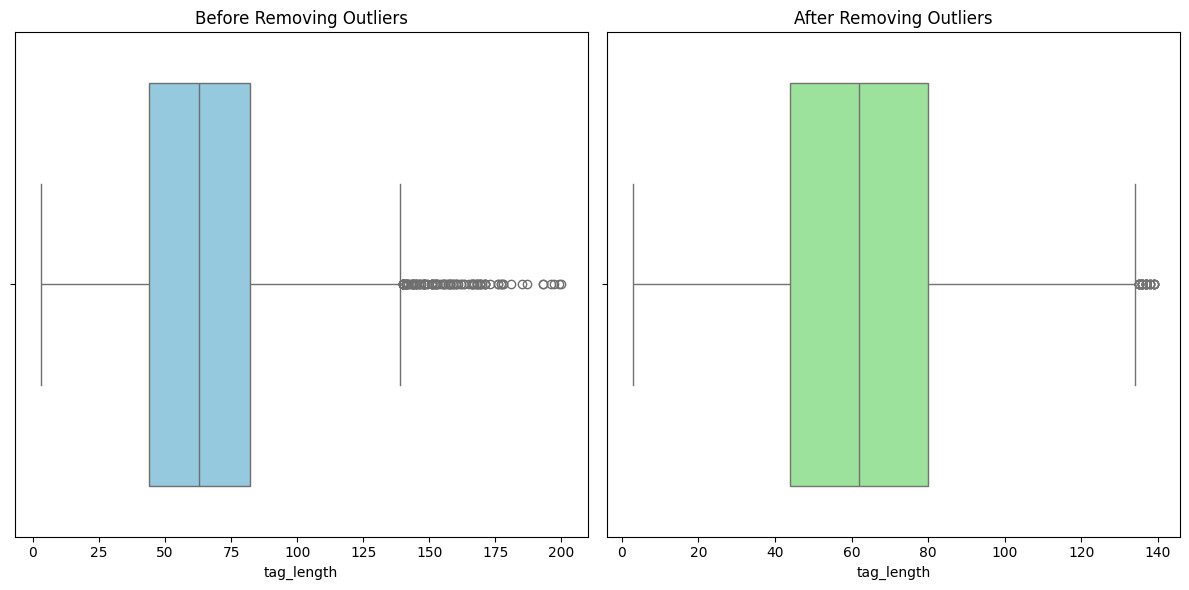

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=new_df['tag_length'], color='skyblue')
plt.title('Before Removing Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=new_df_cleaned['tag_length'], color='lightgreen')
plt.title('After Removing Outliers')

plt.tight_layout()
plt.show()


Summary Statistics

In [ ]:
#Summary Statistics for Numerical Columns
summary_stats = new_df_cleaned[['movie_id', 'tag_length']].describe()
print("Summary Statistics:\n", summary_stats)

mean_value = new_df_cleaned['tag_length'].mean()
median_value = new_df_cleaned['tag_length'].median()
mode_value = new_df_cleaned['tag_length'].mode()[0]
variance_value = new_df_cleaned['tag_length'].var()
std_dev_value = new_df_cleaned['tag_length'].std()

print(f"\nMean of tag length: {mean_value}")
print(f"Median of tag length: {median_value}")
print(f"Mode of tag length: {mode_value}")
print(f"Variance of tag length: {variance_value}")
print(f"Standard Deviation of tag length: {std_dev_value}")

print("\nMost Frequent Movie Titles:")
print(new_df_cleaned['title'].value_counts().head(10))


Summary Statistics:
             movie_id   tag_length
count    4688.000000  4688.000000
mean    56496.329138    63.923848
std     87883.400790    24.958835
min         5.000000     3.000000
25%      9002.000000    44.000000
50%     14537.000000    62.000000
75%     57892.750000    80.000000
max    447027.000000   139.000000

Mean of tag length: 63.92384812286689
Median of tag length: 62.0
Mode of tag length: 40
Variance of tag length: 622.9434209046013
Standard Deviation of tag length: 24.95883452616731

Most Frequent Movie Titles:
title
Out of the Blue            4
Batman                     4
The Host                   2
Glee: The Concert Movie    1
Velvet Goldmine            1
Hamlet 2                   1
Trust the Man              1
The Ice Pirates            1
The Ultimate Gift          1
PCU                        1
Name: count, dtype: int64


In [ ]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4808
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_id    4806 non-null   int64 
 1   title       4806 non-null   object
 2   tags        4806 non-null   object
 3   tag_length  4806 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 187.7+ KB
None


Histogram of Number of Words in Tags

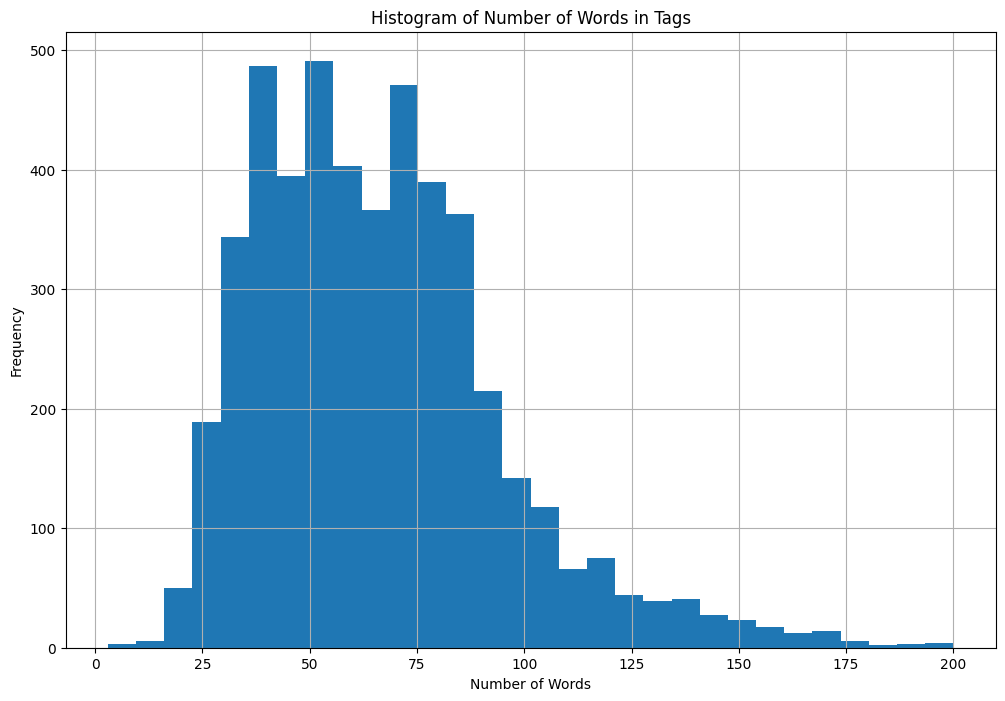

In [ ]:
plt.figure(figsize=(12, 8))
new_df['tags'].str.split().str.len().hist(bins=30)
plt.title('Histogram of Number of Words in Tags')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Box Plot of Tag Length

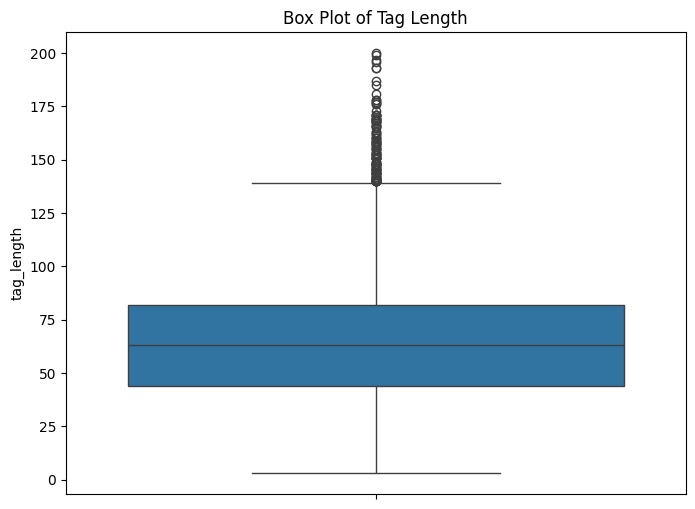

In [ ]:
new_df['tag_length'] = new_df['tags'].str.split().str.len()

plt.figure(figsize=(8, 6))
sns.boxplot(new_df['tag_length'])
plt.title('Box Plot of Tag Length')
plt.show()

Scatter Plot of Movie ID vs. Tag Length

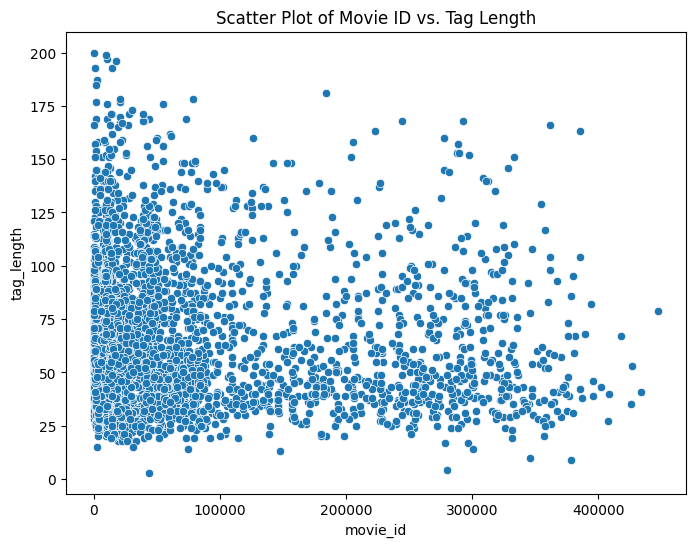

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_df['movie_id'], y=new_df['tag_length'])
plt.title('Scatter Plot of Movie ID vs. Tag Length')
plt.show()

Correlation Matrix Heatmap

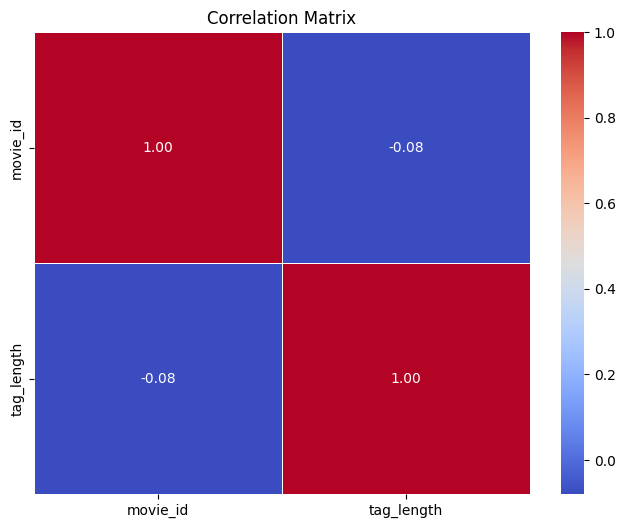

In [ ]:
correlation_df = new_df[['movie_id', 'tag_length']]
corr_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

K-Means Clustering model

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_vectors)

print("✅ K-Means model trained successfully!")

✅ K-Means model trained successfully!


Hierarchical Clustering model

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(reduced_vectors)

print("✅ Hierarchical Clustering model trained successfully!")


✅ Hierarchical Clustering model trained successfully!


DBSCAN Clustering model

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_vectors)

filtered_labels = dbscan_labels[dbscan_labels != -1]
filtered_vectors = reduced_vectors[dbscan_labels != -1]

if len(set(filtered_labels)) > 1:
    print("✅ DBSCAN model trained successfully!")
else:
    print("⚠️ DBSCAN did not form enough clusters.")

⚠️ DBSCAN did not form enough clusters.


Add cluster labels to the dataframe

In [ ]:
new_df = new_df.copy()
new_df['kmeans_cluster'] = kmeans_labels
new_df['hierarchical_cluster'] = hierarchical_labels
new_df['dbscan_cluster'] = dbscan_labels

K-Means Metrics Calculation

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_silhouette = silhouette_score(reduced_vectors, kmeans_labels)

kmeans_db = davies_bouldin_score(reduced_vectors, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_db:.3f}")

K-Means Silhouette Score: 0.019
K-Means Davies-Bouldin Index: 3.540


Hierarchical Clustering Metrics Calculation

In [ ]:
hierarchical_silhouette = silhouette_score(reduced_vectors, hierarchical_labels)

hierarchical_db = davies_bouldin_score(reduced_vectors, hierarchical_labels)

print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.3f}")
print(f"Hierarchical Davies-Bouldin Index: {hierarchical_db:.3f}")

Hierarchical Silhouette Score: 0.136
Hierarchical Davies-Bouldin Index: 1.781


DBSCAN Metrics Calculation

In [ ]:
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(reduced_vectors[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    dbscan_db = davies_bouldin_score(reduced_vectors[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
else:
    dbscan_silhouette = -1
    dbscan_db = float('inf')

print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_db:.3f}")

DBSCAN Silhouette Score: -1.000
DBSCAN Davies-Bouldin Index: inf


Performance Metrics

In [ ]:
metrics = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette],
    'Davies-Bouldin Index': [kmeans_db, hierarchical_db, dbscan_db]
})

print("\nPerformance Metrics:")
print(metrics)


Performance Metrics:
          Model  Silhouette Score  Davies-Bouldin Index
0       K-Means          0.018899              3.540167
1  Hierarchical          0.135881              1.780580
2        DBSCAN         -1.000000                   inf


Performance Metrics bar plot

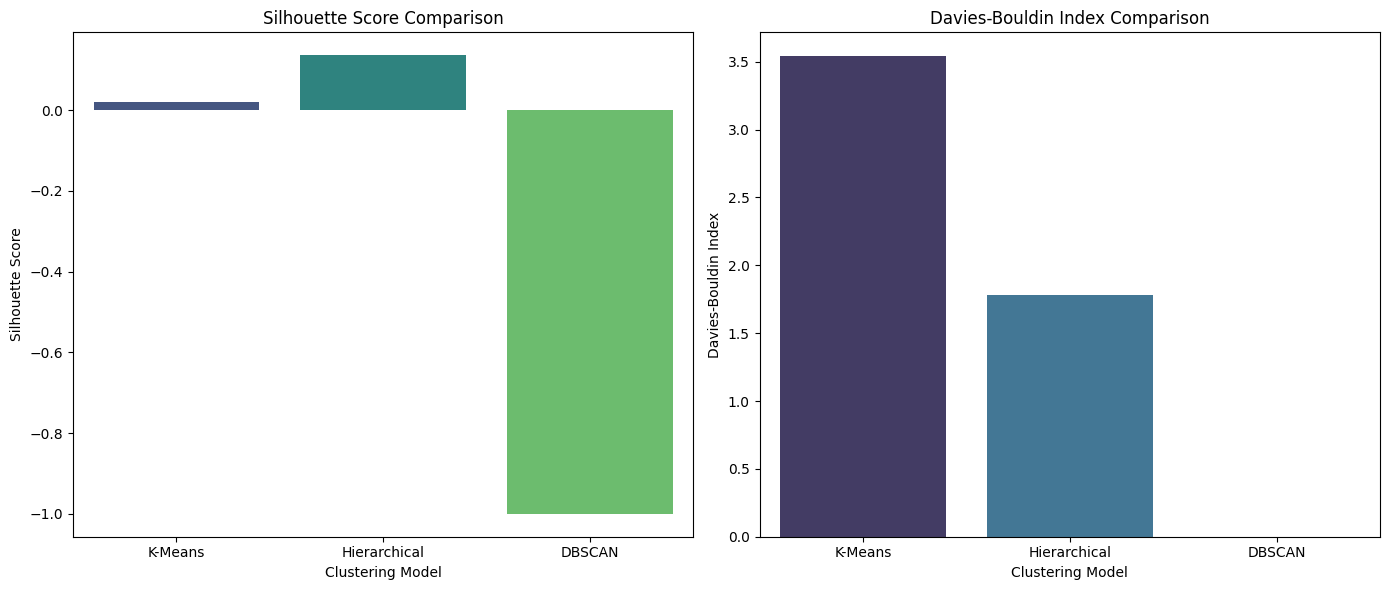

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots for Silhouette Score and Davies-Bouldin Index
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Silhouette Score
sns.barplot(x='Model', y='Silhouette Score', hue='Model', data=metrics, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Silhouette Score Comparison')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_xlabel('Clustering Model')

# Plot Davies-Bouldin Index
sns.barplot(x='Model', y='Davies-Bouldin Index', hue='Model', data=metrics, ax=axes[1], palette='mako', legend=False)
axes[1].set_title('Davies-Bouldin Index Comparison')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_xlabel('Clustering Model')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
recommend('Avatar')

Aliens
Barbarella
Falcon Rising
True Lies
Lara Croft Tomb Raider: The Cradle of Life
